In [1]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
KM = KMeans(n_clusters=2)

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(r"D:\code\python\csdn_nlp\word2vector\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5", binary=False) # 加载时间比较长
#model.init_sims(replace=True)

#model = Word2Vec.load(r"D:\code\python\csdn_nlp\word2vector\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5\sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5")
#加载训练好的模型


D:\ProgramData\Anaconda3\envs\NLP_DEMO\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
D:\ProgramData\Anaconda3\envs\NLP_DEMO\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


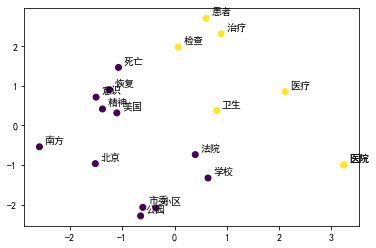

In [5]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] =False
plt.rcParams['font.sans-serif'] = ['SimHei']


corpus = []
B = model.wv.index2word  #获取word2vec训练过的词汇


word_num = 10 # 显示词语的个数

gb = open(r'D:\code\python\csdn_nlp\NLP_DEMO\Resources\dict\THUOCL_medical.txt',encoding='utf-8').readlines()


for word in gb[:word_num]:    #为了方便，每个词库只取了前面30个单词
    word = word.split('\t')
    if word[0] in B:
        corpus.append(word[0])

fb = open(r'D:\code\python\csdn_nlp\NLP_DEMO\Resources\dict\THUOCL_diming.txt',encoding='utf-8').readlines()

for word in fb[:word_num]:
    word = word.split('\t')
    if word[0] in B:
        corpus.append(word[0])
        
vector = model[corpus]
vector_ = pca.fit_transform(vector)

y_ = KM.fit_predict(vector_)


plt.scatter(vector_[:,0],vector_[:,1],c=y_)

for i in range(len(corpus)):    #给每个点进行标注
    plt.annotate(s=corpus[i], xy=(vector_[:, 0][i], vector_[:, 1][i]),
                 xytext=(vector_[:, 0][i] + 0.1, vector_[:, 1][i] + 0.1))
plt.show()